In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
header =['SDSS', 'per', 'vtype']
df_stars_1 = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
df_stars_1 = df_stars_1.dropna(subset=['per'])
df_stars_1['per'] = df_stars_1['per']*24*60
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_stars_1)


                        SDSS       per          vtype
3    SDSSJ001107.26+303235.9    91.439         SU UMa
4    SDSSJ001153.08-064739.2   144.404          U Gem
5    SDSSJ001158.28+315543.7    79.776         SU UMa
7    SDSSJ001538.25+263656.7   146.160         SU UMa
8    SDSSJ001856.92+345444.2   855.494         Polar:
9    SDSSJ002049.51+280020.2    81.475        WZ Sge:
10   SDSSJ002243.55+061002.7   113.760         SU UMa
12   SDSSJ002637.05+242915.6   122.875          Polar
13   SDSSJ002728.00-010828.5    85.435         WZ Sge
14   SDSSJ002842.53+311819.4   312.480             NL
16   SDSSJ003151.76+202051.0   116.454         SU UMa
17   SDSSJ003153.46+084118.5    84.240         WZ Sge
19   SDSSJ003459.90+273619.0   105.653         SU UMa
20   SDSSJ003640.29+230831.3    95.832        SU UMa:
21   SDSSJ003827.05+250924.9   136.096         SU UMa
22   SDSSJ003941.06+005427.4    91.397        WZ Sge:
23   SDSSJ004213.04+073137.8   154.080            IP:
24   SDSSJ004335.13-003729.8

In [3]:
header =['SDSS', 'per', 'vtype']
df_stars_1 = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
df_non_polars = df_stars_1
df_non_polars = df_non_polars[df_non_polars['vtype'].str.contains('Polar')==False]
df_non_polars = df_non_polars[df_non_polars['vtype'].str.contains('PREP')==False]
df_non_polars = df_non_polars[df_non_polars['vtype'].str.contains('IP')==False]
df_non_polars['per']=df_non_polars['per']*24*60
df_non_polars = df_non_polars.dropna()



# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df_non_polars)

In [4]:
df_non_polars

,SDSS,per,vtype
3,SDSSJ001107.26+303235.9,91.438560,SU UMa
4,SDSSJ001153.08-064739.2,144.404366,U Gem
5,SDSSJ001158.28+315543.7,79.776000,SU UMa
7,SDSSJ001538.25+263656.7,146.160000,SU UMa
9,SDSSJ002049.51+280020.2,81.475200,WZ Sge:
...,...,...,...
495,SDSSJ232727.14+085538.6,76.881600,WZ Sge
496,SDSSJ233003.03+303300.4,224.608896,DN
499,SDSSJ234226.21+324819.8,194.149328,U Gem
501,SDSSJ234440.53-001205.8,110.463840,SU UMa


In [5]:
df_polars = df_stars_1
df_polars = df_polars[df_polars['vtype'].str.contains('Polar|PREP|IP')]
df_polars['per']=df_polars['per']*24*60
df_polars = df_polars.dropna()
df_polars

/tmp/ipykernel_5672/4001971549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polars['per']=df_polars['per']*24*60


,SDSS,per,vtype
8,SDSSJ001856.92+345444.2,855.49392,Polar:
12,SDSSJ002637.05+242915.6,122.87520,Polar
23,SDSSJ004213.04+073137.8,154.08000,IP:
28,SDSSJ004924.50+222617.9,354.98880,Polar
32,SDSSJ005657.57+320621.7,95.25420,Polar
...,...,...,...
473,SDSSJ223843.83+010820.6,194.30208,IP
490,SDSSJ231909.18+331539.6,210.47040,IP
491,SDSSJ231930.43+261518.6,180.63360,Polar
497,SDSSJ233325.92+152222.1,83.08800,IP


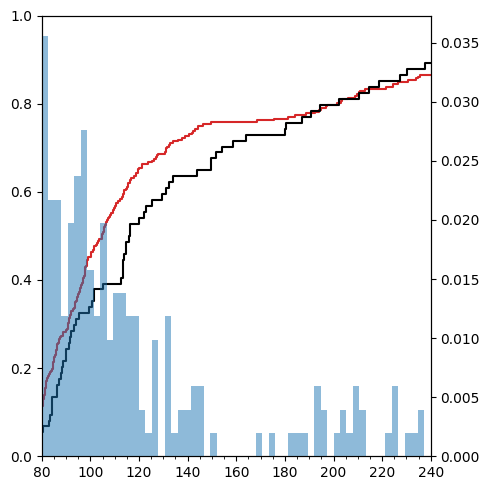

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

color = 'tab:red'
ax1.ecdf(df_non_polars['per'], color = color)
ax1.yaxis.tick_left()
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.set_xlim([80,240])

ax1.ecdf(df_polars['per'], color = 'black')
ax1.yaxis.tick_left()
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.set_xlim([80,240])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.hist(df_non_polars['per'], bins=60, range=(80, 240), density=True, color=color, alpha = 0.5)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_xlim([80,240])



fig.tight_layout()

(80.0, 260.0)

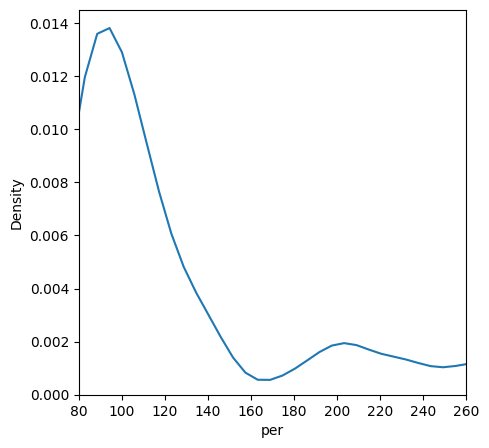

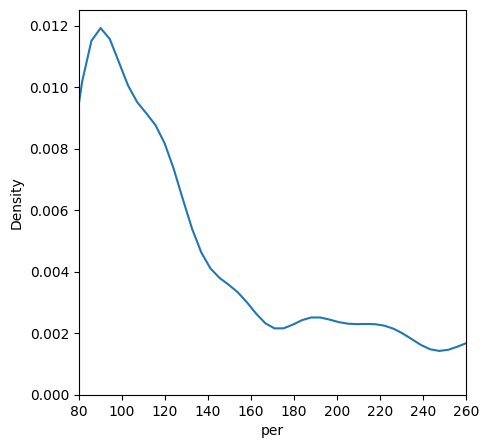

In [32]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
sns.kdeplot(data=df_non_polars['per'], ax=ax1, bw_adjust=.25)
ax1.set_xlim((80,260))

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
sns.kdeplot(data=df_polars['per'], ax=ax1, bw_adjust=.25)
ax1.set_xlim((80,260))


In [8]:
df_non_polars[df_non_polars['per'].between(148,191)], df_polars[df_polars['per'].between(147,191)]

(                        SDSS         per   vtype
 103  SDSSJ075939.78+191417.2  188.544528      NL
 121  SDSSJ081352.02+281317.2  175.680000      NL
 285  SDSSJ123255.10+222209.4  184.046400      NL
 329  SDSSJ143209.77+191403.4  168.624000      NL
 405  SDSSJ162718.38+120434.9  149.760000  SU UMa
 451  SDSSJ214354.60+124457.9  181.440000   Z Cam,
                         SDSS        per  vtype
 23   SDSSJ004213.04+073137.8  154.08000    IP:
 81   SDSSJ072910.68+365838.2  149.76000  Polar
 94   SDSSJ075240.44+362823.2  164.16000  Polar
 139  SDSSJ083750.99+383012.4  180.00000  Polar
 312  SDSSJ132411.57+032050.5  158.71680  Polar
 371  SDSSJ155412.33+272152.4  151.86528  Polar
 373  SDSSJ155538.12+380250.5  149.76000  Polar
 388  SDSSJ161007.50+035232.7  190.54080  Polar
 491  SDSSJ231930.43+261518.6  180.63360  Polar
 502  SDSSJ234502.47+342923.9  187.20000  Polar)